# Exploring Dandiset 001375: Septum GABA disruption with DREADDs

> **Note**: This notebook was generated with the assistance of AI. Please carefully review and validate all code and interpretations before using for research purposes.

## Overview of the Dandiset

This notebook explores [Dandiset 001375: Septum GABA disruption with DREADDs](https://dandiarchive.org/dandiset/001375/0.250406.1855), which contains extracellular electrophysiological recordings from mice. The dataset investigates the effects of septal GABAergic disruption on hippocampal and neocortical activity using Designer Receptors Exclusively Activated by Designer Drugs (DREADDs) technology.

The experiment involves mice running laps in a virtual hallway while neural activity is recorded from the ventral hippocampus and visual cortex.

## What This Notebook Covers

This notebook will guide you through:

1. Accessing basic metadata about the Dandiset
2. Exploring the NWB files available in the collection
3. Examining session and subject information
4. Investigating electrode groups and their properties
5. Visualizing raw neural data
6. Exploring spike data and unit activity
7. Aligning neural data with behavioral trials

## Required Packages

In [1]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pynwb
import h5py
import remfile
from dandi.dandiapi import DandiAPIClient
from itertools import islice

## Accessing Dandiset Information

In [2]:
# Connect to the DANDI API and retrieve basic information about the Dandiset
client = DandiAPIClient()
dandiset = client.get_dandiset("001375", "0.250406.1855")
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")
print(f"Description: {metadata.get('description', 'No description available')}")

Dandiset name: Septum GABA disruption with DREADDs
Dandiset URL: https://dandiarchive.org/dandiset/001375/0.250406.1855
Description: Pilot study of the effect of disrupting septal gabaergic activity using DREADDs on hippocampal and neocortical activity


## Exploring NWB Files in the Dandiset

In [3]:
# List all NWB assets in the Dandiset
assets = list(dandiset.get_assets_by_glob("*.nwb"))

print(f"Number of NWB files: {len(assets)}\n")
for asset in assets:
    sz = asset.size / (1024 ** 3)
    print(f"- {asset.path} ({sz:.2f} GB)")
    # Generate Neurosift link for quick online viewing
    print(f"  View online: https://neurosift.app/nwb?dandisetId=001375&dandisetVersion=0.250406.1855&path={asset.path}")

Number of NWB files: 3

- sub-MS13B/sub-MS13B_ses-20240725T190000_ecephys.nwb (51.20 GB)
  View online: https://neurosift.app/nwb?dandisetId=001375&dandisetVersion=0.250406.1855&path=sub-MS13B/sub-MS13B_ses-20240725T190000_ecephys.nwb
- sub-MS14A/sub-MS14A_ses-20240906T190000_obj-12781w8_ecephys.nwb (64.68 GB)
  View online: https://neurosift.app/nwb?dandisetId=001375&dandisetVersion=0.250406.1855&path=sub-MS14A/sub-MS14A_ses-20240906T190000_obj-12781w8_ecephys.nwb
- sub-MS14A/sub-MS14A_ses-20240906T190000_obj-ardad2_ecephys.nwb (65.00 GB)
  View online: https://neurosift.app/nwb?dandisetId=001375&dandisetVersion=0.250406.1855&path=sub-MS14A/sub-MS14A_ses-20240906T190000_obj-ardad2_ecephys.nwb


The Dandiset contains three large NWB files, each exceeding 50 GB. For this exploration, we'll examine one example file in detail: `sub-MS13B/sub-MS13B_ses-20240725T190000_ecephys.nwb`.

**Note:** You can quickly browse the contents of each file using the Neurosift links above.

## Session and Subject Information

Let's examine the basic metadata from our example NWB file:

In [4]:
# Access remote NWB file without downloading
client = DandiAPIClient()
dandiset = client.get_dandiset("001375", "0.250406.1855")
asset = next(dandiset.get_assets_by_glob("sub-MS13B/sub-MS13B_ses-20240725T190000_ecephys.nwb"))
remote_file = remfile.File(asset.download_url)
h5_file = h5py.File(remote_file, 'r')
io = pynwb.NWBHDF5IO(file=h5_file, load_namespaces=True)
nwb = io.read()

# Extract general info
info = {
    "Session description": nwb.session_description,
    "Session start time": str(nwb.session_start_time),
    "Subject ID": nwb.subject.subject_id,
    "Subject sex": nwb.subject.sex,
    "Subject species": nwb.subject.species,
    "Subject age": nwb.subject.age,
    "Subject description": nwb.subject.description,
}

# Count electrodes, units, trials
n_electrodes = nwb.electrodes.to_dataframe().shape[0]
n_units = nwb.units.to_dataframe().shape[0]
n_trials = nwb.trials.to_dataframe().shape[0]

info["Number of electrodes"] = n_electrodes
info["Number of units"] = n_units
info["Number of trials"] = n_trials

print("Session and Subject Information:")
for k, v in info.items():
    print(f"{k}: {v}")

/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Session and Subject Information:
Session description: mouse running laps in virtual hallway
Session start time: 2024-07-25 19:00:00-07:00
Subject ID: MS13B
Subject sex: M
Subject species: Mus musculus
Subject age: P90D
Subject description: medial septum DREADD to suppress GABA interneurons
Number of electrodes: 256
Number of units: 33
Number of trials: 387


This dataset contains recordings from a male mouse (MS13B) at postnatal day 90, running laps in a virtual hallway. The recording captured activity from 256 electrodes, with 33 identified units (neurons) across 387 behavioral trials or laps.

Let's look at the first few trials to understand the behavioral structure:

In [5]:
# Preview trial information
trials_df = nwb.trials.to_dataframe().head()
print("\nFirst 5 trials:")
print(trials_df)


First 5 trials:
    start_time  stop_time
id                       
0     4.323800  16.929833
1    16.963067  28.414333
2    28.447100  39.402833
3    39.435833  50.027033
4    50.059667  63.064467


The trials table shows start and stop times for each lap in the virtual hallway. Each row represents a single lap with its timing information.

## Electrode Information

Now let's look at how the electrodes are organized:

In [6]:
# Electrode table information
electrodes_df = nwb.electrodes.to_dataframe()

# Show the first few electrodes
print('First 8 electrodes:')
print(electrodes_df.head(8))

First 8 electrodes:
       x       y location        filtering  \
id                                           
0   20.0  1375.0  unknown  0.1 - 7500.0 Hz   
1   20.0  1325.0  unknown  0.1 - 7500.0 Hz   
2   20.0  1275.0  unknown  0.1 - 7500.0 Hz   
3   20.0  1225.0  unknown  0.1 - 7500.0 Hz   
4   20.0  1175.0  unknown  0.1 - 7500.0 Hz   
5   20.0  1125.0  unknown  0.1 - 7500.0 Hz   
6   20.0  1075.0  unknown  0.1 - 7500.0 Hz   
7   20.0  1025.0  unknown  0.1 - 7500.0 Hz   

                                                group group_name  \
id                                                                 
0   shank1 pynwb.ecephys.ElectrodeGroup at 0x14068...     shank1   
1   shank1 pynwb.ecephys.ElectrodeGroup at 0x14068...     shank1   
2   shank1 pynwb.ecephys.ElectrodeGroup at 0x14068...     shank1   
3   shank1 pynwb.ecephys.ElectrodeGroup at 0x14068...     shank1   
4   shank1 pynwb.ecephys.ElectrodeGroup at 0x14068...     shank1   
5   shank1 pynwb.ecephys.ElectrodeGroup at 

The electrode table contains metadata like physical coordinates, group assignments, and filtering properties for each electrode. Next, let's visualize how electrodes are organized by group and location:

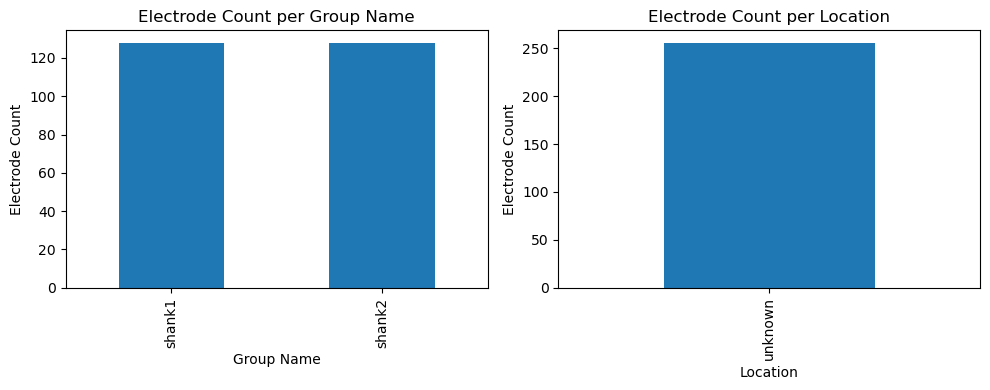

In [7]:
# Summarize unique locations, group names, and count distribution by group
location_counts = electrodes_df['location'].value_counts()
group_counts = electrodes_df['group_name'].value_counts()

# Plot electrode group counts and locations
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
group_counts.plot(kind='bar')
plt.title('Electrode Count per Group Name')
plt.xlabel('Group Name')
plt.ylabel('Electrode Count')

plt.subplot(1,2,2)
location_counts.plot(kind='bar')
plt.title('Electrode Count per Location')
plt.xlabel('Location')
plt.ylabel('Electrode Count')
plt.tight_layout()
plt.show()

The plots show that:

- Electrodes are divided evenly between two groups (shanks), likely representing separate recording probes
- Location information is listed as "unknown" for all electrodes in the metadata, though the subject description indicates the electrodes were placed in the ventral hippocampus and visual cortex

Let's check the specific details about each electrode group:

In [8]:
# Print electrode group information
for name, group in nwb.electrode_groups.items():
    print(f"Group: {name}")
    print(f"  - Description: {group.description}")
    print(f"  - Location: {group.location}")
    print(f"  - Device: {group.device.description} ({group.device.manufacturer})")

Group: shank1
  - Description: shank1, electrodes
  - Location: ventral hippocampus, visual cortex
  - Device: 128 ch silicon probe (UCLA)
Group: shank2
  - Description: shank2, electrodes
  - Location: ventral hippocampus, visual cortex
  - Device: 128 ch silicon probe (UCLA)


## Visualizing Raw Electrophysiology Data

Let's look at the raw neural signals from a few channels:

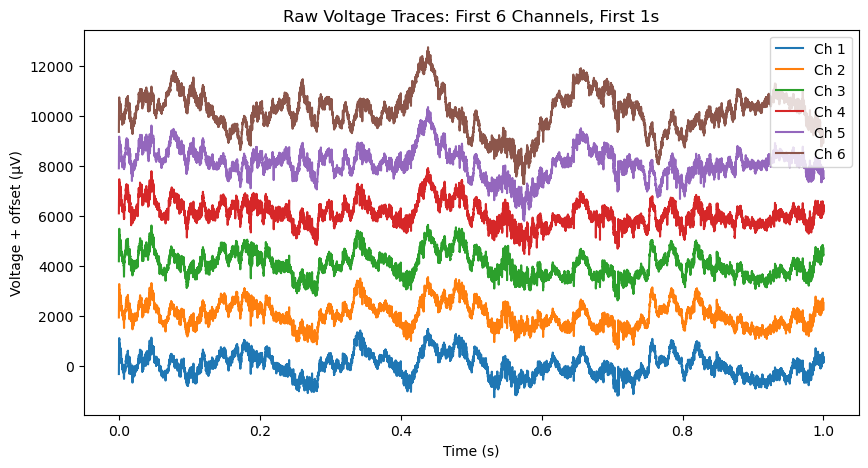

Sampling rate: 30000.0 Hz
Units: mV
Number of channels: 256
Number of samples: 144675584 (duration: 4822.52 s)


In [9]:
# Access the time_series -- raw voltage acquisition
ts = nwb.acquisition['time_series']

# Extract a short segment: the first 1000 ms (30,000 samples @ 30 kHz), first 6 channels
segment = ts.data[:30000, :6]  # [time, channels]
time = np.arange(segment.shape[0]) / ts.rate  # time in seconds

# Plot raw traces for 6 channels
plt.figure(figsize=(10,5))
for ch in range(6):
    plt.plot(time, segment[:, ch] + ch*2000, label=f'Ch {ch+1}')  # offset for visibility
plt.xlabel('Time (s)')
plt.ylabel('Voltage + offset (μV)')
plt.title('Raw Voltage Traces: First 6 Channels, First 1s')
plt.legend(loc='upper right')
plt.show()

# Print time series metadata
print(f"Sampling rate: {ts.rate} Hz")
print(f"Units: {ts.unit}")
print(f"Number of channels: {ts.data.shape[1]}")
print(f"Number of samples: {ts.data.shape[0]} (duration: {ts.data.shape[0]/ts.rate:.2f} s)")

The raw voltage traces show typical extracellular recordings with a mix of fast spikes and slower oscillations. Each channel is offset vertically for better visualization.

## Exploring Neural Spiking Data

Now let's look at the neural spiking activity:

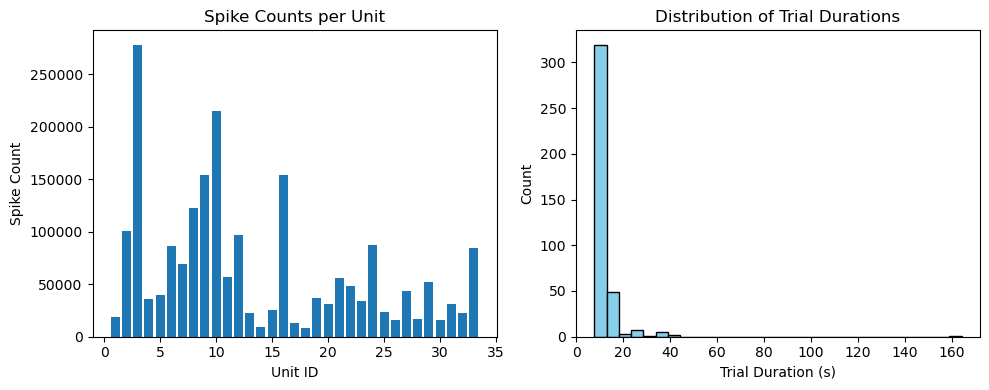

Total units: 33
Mean spikes per unit: 63935.3
Min/Max spikes: 8291 / 278061
Mean trial duration: 12.30 s


In [10]:
# Get unit dataframe
units_df = nwb.units.to_dataframe()

# 1. Distribution of spike counts per unit
spike_counts = units_df.spike_times.apply(len)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.bar(spike_counts.index, spike_counts.values)
plt.xlabel('Unit ID')
plt.ylabel('Spike Count')
plt.title('Spike Counts per Unit')

# 2. Distribution of trial durations
trial_durations = nwb.trials.to_dataframe()['stop_time'] - nwb.trials.to_dataframe()['start_time']
plt.subplot(1,2,2)
plt.hist(trial_durations, bins=30, color='skyblue', edgecolor='k')
plt.xlabel('Trial Duration (s)')
plt.ylabel('Count')
plt.title('Distribution of Trial Durations')
plt.tight_layout()
plt.show()

# Print summary statistics
print(f"Total units: {len(spike_counts)}")
print(f"Mean spikes per unit: {spike_counts.mean():.1f}")
print(f"Min/Max spikes: {spike_counts.min()} / {spike_counts.max()}")
print(f"Mean trial duration: {trial_durations.mean():.2f} s")

These plots show:

1. **Spike Counts per Unit:** The distribution of spikes across all identified neurons, showing variability in firing rates
2. **Trial Durations:** The distribution of lap durations in the virtual hallway, with most trials lasting around 10-20 seconds

Let's visualize the spiking activity as a raster plot for a few example units:

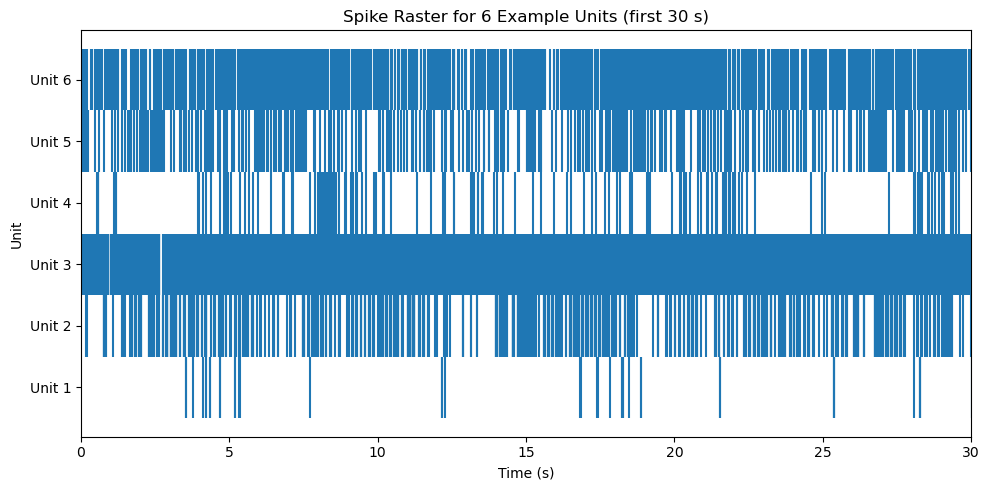

In [11]:
# Let's plot spike rasters for the first 6 units
plt.figure(figsize=(10,5))
for idx, (unit_id, row) in enumerate(units_df.head(6).iterrows()):
    spike_times = row['spike_times']
    plt.vlines(spike_times, idx+0.5, idx+1.5)
plt.yticks(np.arange(1, 7), [f'Unit {uid}' for uid in units_df.head(6).index])
plt.xlabel('Time (s)')
plt.ylabel('Unit')
plt.title('Spike Raster for 6 Example Units (first 30 s)')
plt.xlim(0, 30)  # Display first 30 seconds
plt.tight_layout()
plt.show()

The raster plot shows spike times for 6 different neurons during the first 30 seconds of the recording. Each row represents a different unit, and each vertical line represents the time of an action potential (spike). Units show different firing rates and patterns.

## Aligning Spikes to Behavioral Events

Finally, let's demonstrate how to align neural activity to behavioral events (trial starts):

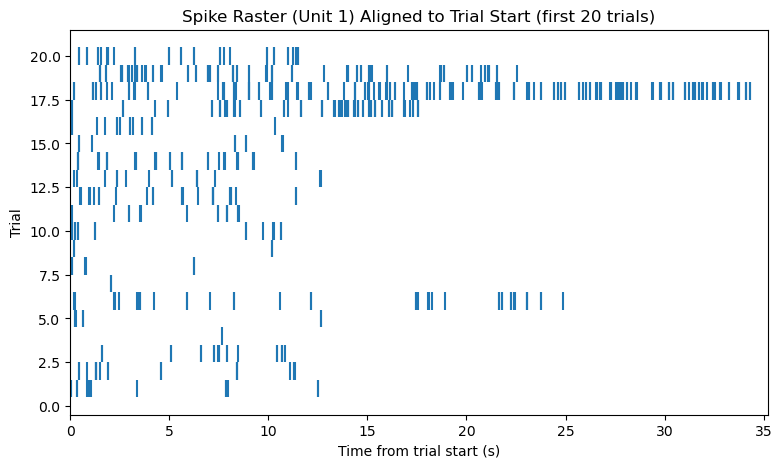

In [12]:
# Select an example unit (first unit)
unit_id, unit_row = next(units_df.iterrows())
spike_times = np.array(unit_row['spike_times'])

# Use first 20 trials
trial_starts = nwb.trials.to_dataframe()['start_time'].values[:20]
trial_durations = (nwb.trials.to_dataframe()['stop_time'] - nwb.trials.to_dataframe()['start_time']).values[:20]

# Align spikes to trial start
peri_spike_times = []
for t_start, t_dur in zip(trial_starts, trial_durations):
    rel_spikes = spike_times[(spike_times >= t_start) & (spike_times <= t_start+t_dur)] - t_start
    peri_spike_times.append(rel_spikes)

# Plot raster (trial-aligned)
plt.figure(figsize=(9, 5))
for i, spikes in enumerate(peri_spike_times):
    plt.vlines(spikes, i+0.5, i+1.5)
plt.xlabel('Time from trial start (s)')
plt.ylabel('Trial')
plt.title(f'Spike Raster (Unit {unit_id}) Aligned to Trial Start (first 20 trials)')
plt.xlim(0, np.max(trial_durations))
plt.show()

This trial-aligned raster shows the spiking activity of a single unit (neuron) across different trials, with each spike positioned relative to the start of that trial. This type of visualization is essential for discovering neural correlates of behavior.

## Summary & Next Steps

In this notebook, we've explored key aspects of Dandiset 001375, which contains extracellular neural recordings from mice with septal GABAergic disruption:

- **Dataset structure:** This Dandiset contains three NWB files, each containing neural recordings from different sessions.
- **Metadata:** Information about subjects, sessions, electrodes, and experimental setup.
- **Neural Data:** Raw electrophysiology signals and spike times from sorted units.
- **Behavior:** Trial structure marking laps in a virtual hallway.

The code demonstrated here can be applied to any of the NWB files in this Dandiset.

**Potential next steps:**
- Analyze firing rates during different behavioral epochs
- Examine neural synchronization and population dynamics
- Investigate field potentials and oscillations
- Compare activity across different recording sites